# &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  <u>DATA TRAINED</u>

## &emsp; &emsp; &emsp;   &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  <u>Evaluation Project</u>

### &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  <u>Avocado</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### <U>DATASET Description:</U>

`Problem Statement:`

<U>Avocado is a fruit consumed by people heavily in the United States.</U> 

#### Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

<U>`Some relevant columns in the dataset:`</U>

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

`Target columns:`
- Region
- Avrage Price

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


` Performing EDA of the given DATASET:`

In [3]:
df.shape

(18249, 14)

In [4]:
# Type of data in the given table:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# Checking for null valus in dataset:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# Droping "Unnamed: 0" as it has no impact on the outcome or target columns:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


` Type of data:`
- Date= "Date Type"
- AvragePric= "Continuous"
- Total Volume= "Continuous"
- 4046= "Continuous"
- 4225= "Continuous"
- 4770= "Continuous"
- Total Bags= "Continuous"
- Small Bags= "Continuous"
- Large Bags= "Continuous"
- XLarge Bags= "Continuous"
- type= "Categorical"
- year= "Categorical"
- region= "Categorical"

In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- High values in "std" for Total Bags, Small Bags, XLarge Bags, Therefore skewness is present in the dataset.

- Large diffrence between values of  (Large Bags, Xlarge Bags) for "mean", "75", "max".

In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

 <B>`Analyzing Target Variable:` </B>

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

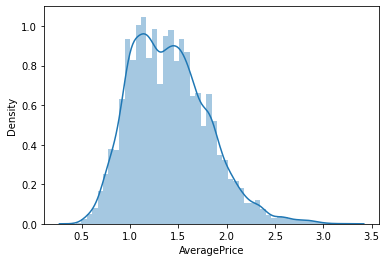

In [12]:
sns.distplot(df.AveragePrice)

In [13]:
df.AveragePrice.skew()

0.5803027378878419

 <B>`Analyzing the feature columns:` </B>

In [14]:
 df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

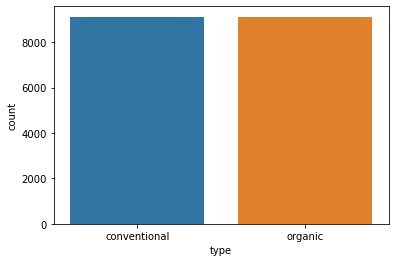

In [16]:
sns.countplot(df.type)

'Type' column is almost balanced 

In [17]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Given data is of (2015,2016,2017,2018) years

<AxesSubplot:xlabel='year', ylabel='count'>

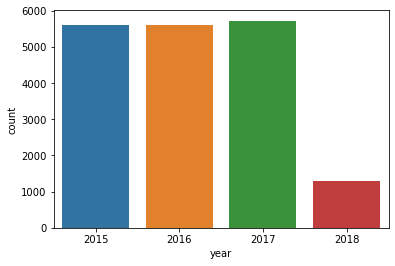

In [18]:
sns.countplot(df.year)

 less data is available for year "2018" compared to other years data.

In [19]:
df.region.nunique()

54

In [20]:
df.region.value_counts()

Philadelphia           338
Midsouth               338
LasVegas               338
NorthernNewEngland     338
Houston                338
Denver                 338
Indianapolis           338
HartfordSpringfield    338
Seattle                338
SouthCentral           338
Boston                 338
Jacksonville           338
BuffaloRochester       338
BaltimoreWashington    338
TotalUS                338
SanFrancisco           338
GrandRapids            338
MiamiFtLauderdale      338
CincinnatiDayton       338
RichmondNorfolk        338
HarrisburgScranton     338
Nashville              338
Boise                  338
Detroit                338
StLouis                338
DallasFtWorth          338
Spokane                338
Plains                 338
NewOrleansMobile       338
LosAngeles             338
Albany                 338
Syracuse               338
California             338
Roanoke                338
Columbus               338
Louisville             338
Charlotte              338
N

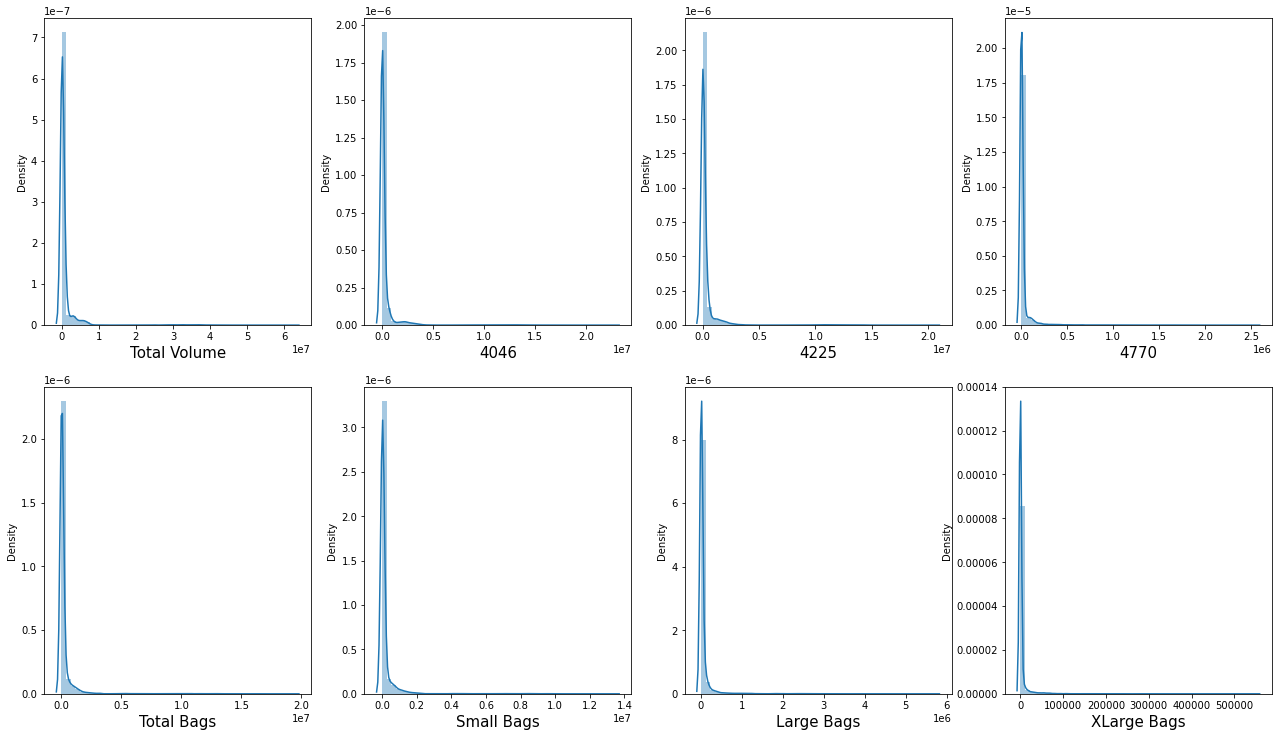

In [21]:
plt.figure(figsize=(22,26), facecolor='white')
plotnum=1
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags', 'Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
    
plt.show()

In [22]:
# Data is not clear from the above ggraph as the value count is high. therefore creating small protion of data sat to visualize below:
dfsmall= df.head(250)

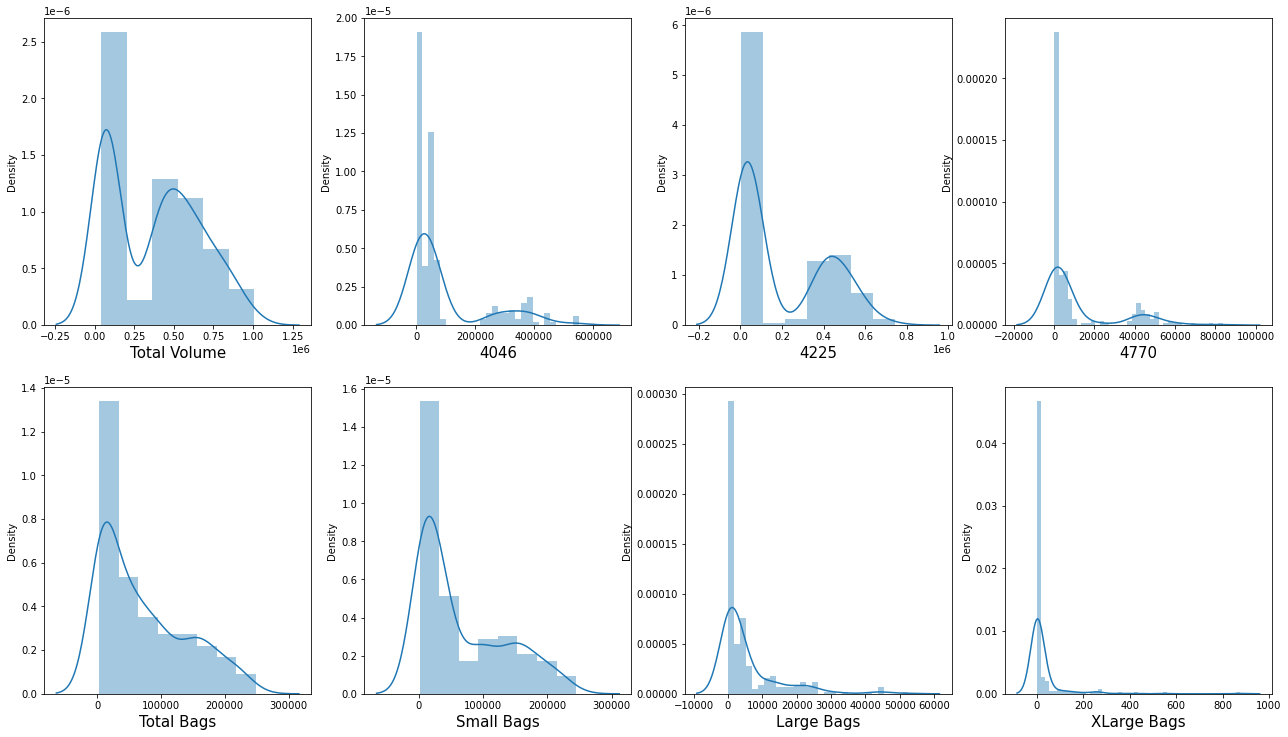

In [23]:
plt.figure(figsize=(22,26), facecolor='white')
plotnum=1
for col in dfsmall[['Total Volume','4046','4225','4770','Total Bags','Small Bags', 'Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(dfsmall[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
    
plt.show()

Total Bags, Large Bag, Small Bag and XLarge Bags have skewed data

In [24]:
#we observe , in total voloume, 4225,small bags, total bags ,the data is righlty skewed, hence large no of skewness present in the data, however in 4770,Xlarge bags,4046,has no skewness

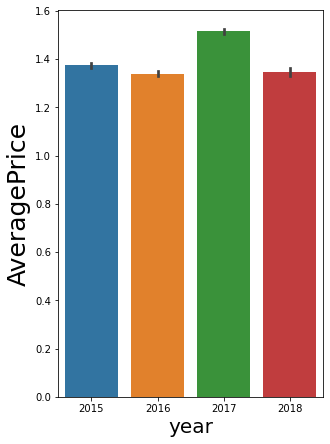

In [25]:
plt.figure(figsize=(20,30),facecolor="white")
plotnum=1
y= df['AveragePrice']
x=df[['year']]
for col in x:
    if plotnum<=25:
        plt.subplot(5,5,plotnum)
        sns.barplot(x[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=25)
    plotnum+=1
    
plt.tight_layout()

`maximum "Average Price" was in the year 2017`

 Creating a group data plot to get better relation between 'Date'-'AveragePrice'

Text(0.5, 1.0, 'Average Price custom')

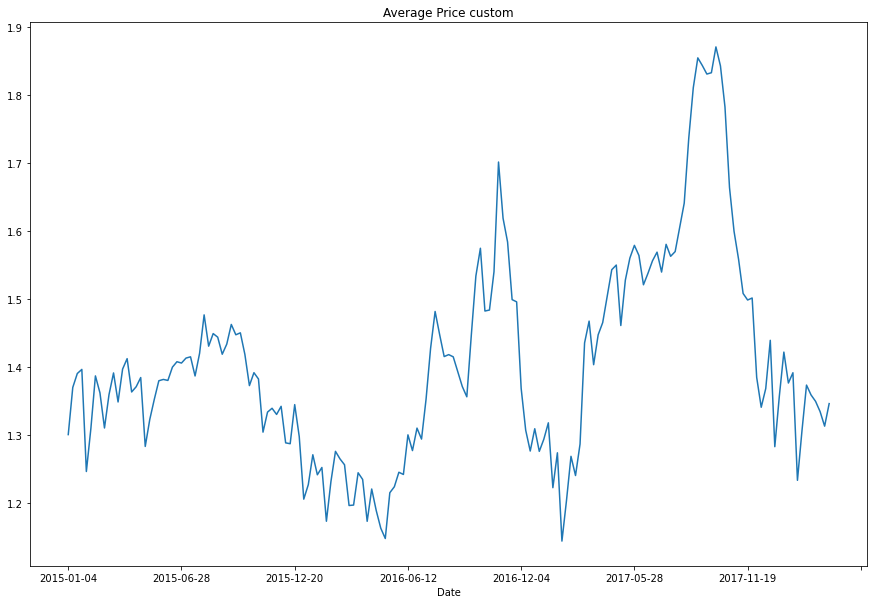

In [26]:
plt.figure(figsize=(15,10))
df.groupby('Date').mean()['AveragePrice'].plot()
plt.title('Average Price custom')

`Graph represents:`
- high decline in average price between "28-06-2015" to 12-06-2016
- increase again till 04-12-2016
- highset average price was during 2017


<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

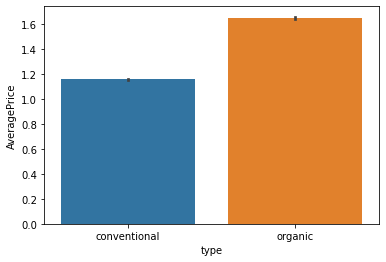

In [27]:
sns.barplot(x='type',y='AveragePrice',data=df)

'Organic' Avocado 'Average Price' is higher compared to 'conventional' Avocado

`Finding production of all conventional type avocado`

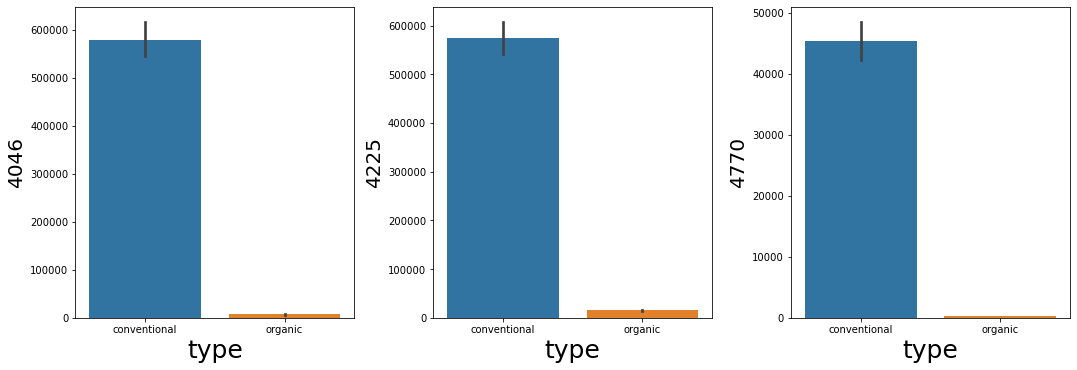

In [28]:
plt.figure(figsize=(25,25))
plotnum=1
x=df['type']
y=df[['4046','4225','4770']]

for i in y:
    if plotnum<=30:
        plt.subplot(5,5,plotnum)
        sns.barplot(x,y[i])
        plt.xlabel('type',fontsize=25)
        plt.ylabel(i,fontsize=20)
    plotnum+=1
    
plt.tight_layout()

Above plot show that Avocado production of all conventional type is very high in comaprision to organic type avocado.

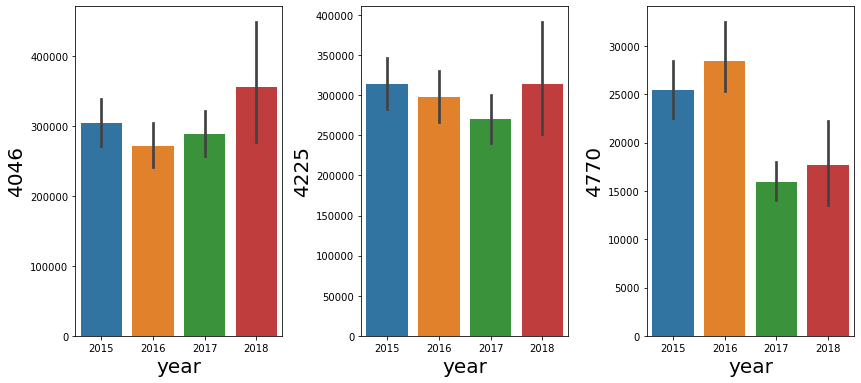

In [29]:
# getting Production data of all conventional avocado over the year:
plt.figure(figsize=(20,26))
plotnum=1
x=df['year']
y=df[['4046','4225','4770']]
for i in y:
    if plotnum<=25:
        plt.subplot(5,5,plotnum)
        sns.barplot(x,y[i])
        plt.xlabel('year',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plotnum+=1
    
plt.tight_layout()

`Above graaph shows that:`
- Production of 4046 has increased from 2015 to 2018
- production of 4225 is consistent over the years
- Production of 4770 has decreased over the year 2015 to 2018

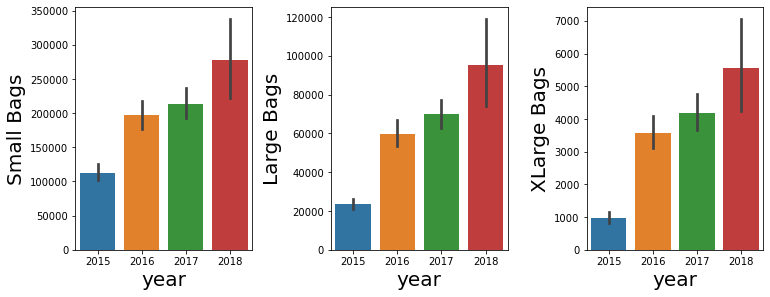

In [30]:
# finding the production of all bags over the year:
plt.figure(figsize=(25,20))
plotnum=1
x=df['year']
y=df[['Small Bags','Large Bags','XLarge Bags']]
for i in y:
    if plotnum<=25:
        plt.subplot(5,7,plotnum)
        sns.barplot(x,y[i])
        plt.xlabel('year',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plotnum+=1
    
plt.tight_layout()

` Above graph shows:`
- production of all type of bags have grown over the year
- small bags are produced in larger quantity
- large bags are produced in medium quantity
- XLarge bags are produced in least quantity


In [31]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


` Droping columns:`
 - Total volume- droping as it is the sum of 4046 + 4225 + 4770 + Total Bag
 - Total Bags- droping as it is the sum of Small Bag + Large Bag + XLaarge Bag

In [33]:
df.drop(columns = ['Total Volume','Total Bags' ],inplace = True)

In [34]:
df

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [35]:
# Creating new columns "day", "Month"
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda d:d.day)
df['Month']=df['Date'].apply(lambda m:m.month)

In [36]:
df

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [37]:
# droping "Date" since it has no value to good model for prediction:
df.drop(columns = ['Date'],inplace= True)

In [38]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


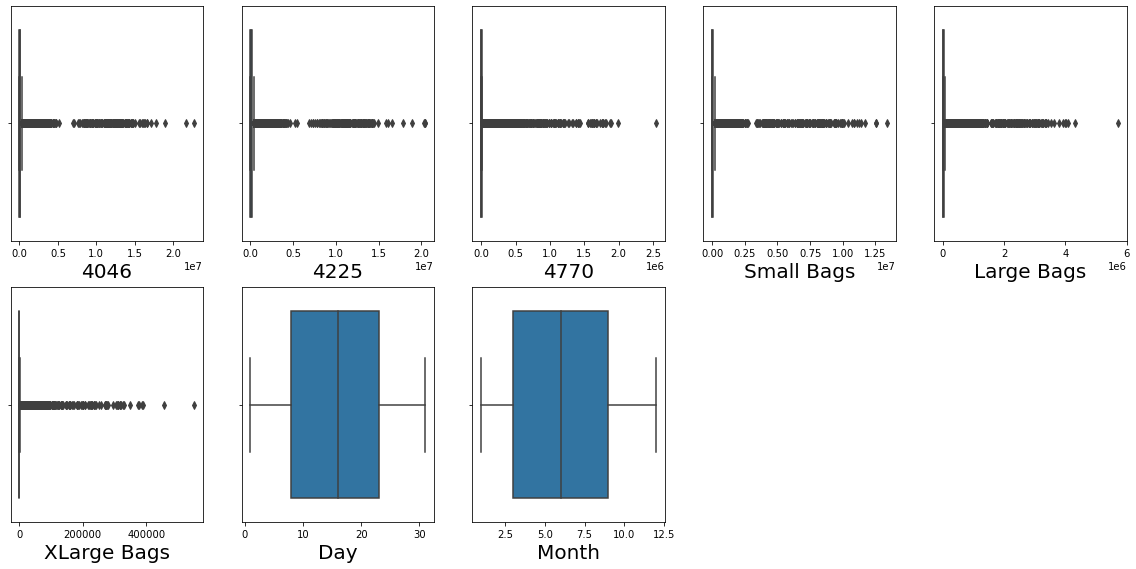

In [39]:
# Outliers check:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for i in df.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnum+=1
plt.show()

`Removing Outliers:`

In [46]:
# making a copy of all continuous data type columns:

df5 =df.drop(columns = ['AveragePrice','year','type','region'],axis=1).copy()

In [47]:
df5

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,27,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,20,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,13,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,6,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,29,11
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,4,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,28,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,21,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,14,1


In [48]:
# Using Z Score Method:
from scipy.stats import zscore
zscor = zscore(df5)
z_score_abs = np.abs(zscor)

df4 = df5[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [50]:
df5.shape

(18249, 8)

In [51]:
df4.shape

(17782, 8)

In [52]:
# Data Loss:

loss=(18249-17782)/18249 * 100
loss

2.55904433119623

#### IQR Method:

In [53]:
df2 =df.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy()

In [54]:
# find all the indices of outliers in the columns using IQR and append them to indxdrop array:

indxdrop = np.array([])
for i in df2:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df2[i]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)


In [55]:
indxdrop

array([   52.,    54.,    55., ...,  9121., 18220., 18232.])

In [56]:
df2= df2.drop(indxdrop)

In [57]:
df2.shape

(11747, 8)

In [58]:
# Data loss:
loss=(18249-11747)/18249 * 100
loss

35.62934955340019

 Loss not Acceptable

In [63]:
# Using Z Score to reduce Outliers:
dropindx = df.index.difference(df4.index)


In [64]:

dropindx

Int64Index([ 346,  359,  780,  781,  783,  787,  788,  790,  791,  792,
            ...
            9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113],
           dtype='int64', length=467)

In [65]:

df.drop(dropindx,inplace = True)

In [66]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [67]:
df.reset_index(drop=True,inplace = True)

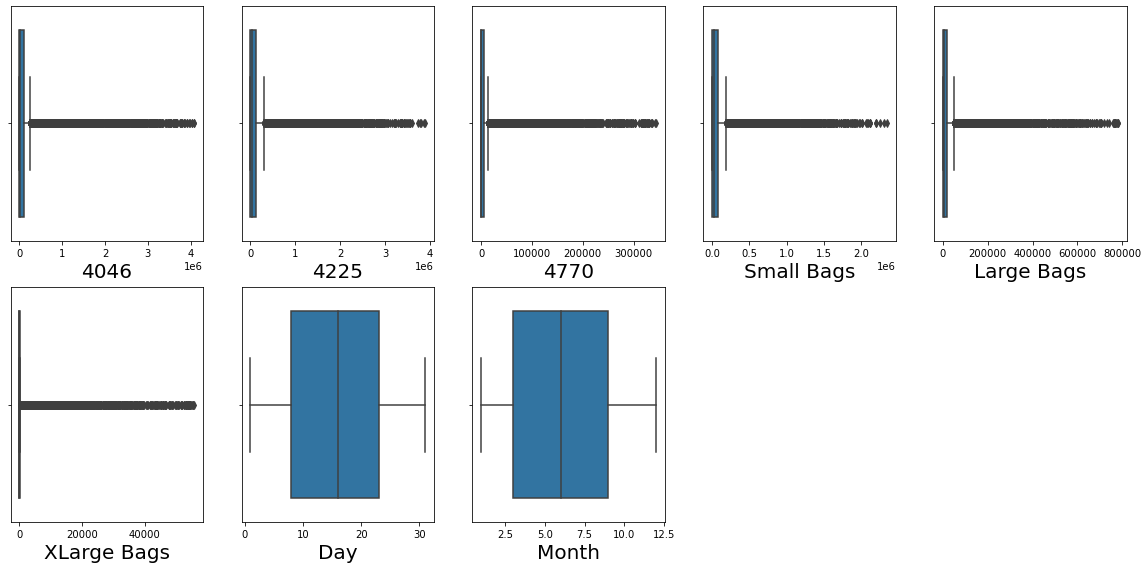

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Few outliers have been removed:

In [69]:
# Skewness Check:
df.skew()

AveragePrice    0.560969
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64


Normalizing Data Distribution using PowerTransformer

In [70]:
from sklearn.preprocessing import PowerTransformer

In [71]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [72]:
df6 = df.drop(columns = ['year','type','region','AveragePrice'],axis=1)

In [73]:
transformed= powtrans.fit_transform(df6)

In [74]:
type(transformed)

numpy.ndarray

In [75]:
transformed = pd.DataFrame(transformed, columns=df6.columns) #to convert numpy array back into dataframe

In [76]:
transformed.skew()

4046          -0.038259
4225          -0.043246
4770           0.028015
Small Bags    -0.024657
Large Bags    -0.110061
XLarge Bags    0.860603
Day           -0.209306
Month         -0.149112
dtype: float64

In [77]:
transformed.index = df.index

In [78]:
Skewed = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [79]:
df[Skewed] = transformed[Skewed]

In [80]:
df.skew()

AveragePrice    0.560969
4046           -0.038259
4225           -0.043246
4770            0.028015
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

 More skewness removed

In [81]:
# Creating a small test file:
dftest=df.head(250)

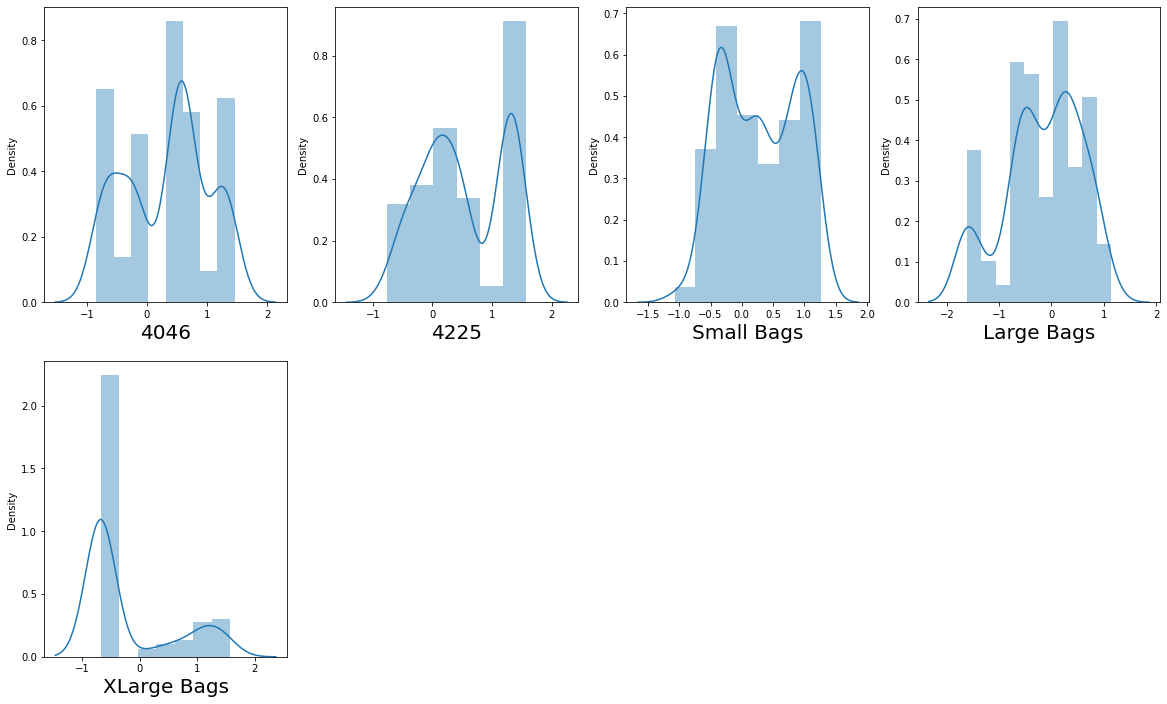

In [82]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in dftest[['4046','4225','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(dftest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

`Data is almost eqally distributed now`

In [84]:
 # Encoding "type" using get_dummies:

dumm=pd.get_dummies(df[['type']],drop_first= False)
dumm

,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17777,0,1
17778,0,1
17779,0,1
17780,0,1


In [85]:
df= df.join(dumm)

In [86]:
df.drop(columns = ['type'],inplace=True)

In [87]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,Albany,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,Albany,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,Albany,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,Albany,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,Albany,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,WestTexNewMexico,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,WestTexNewMexico,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,WestTexNewMexico,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,WestTexNewMexico,14,1,0,1


In [88]:
# Encoding "region" using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [89]:
labenc = LabelEncoder()

In [90]:
df.region = labenc.fit_transform(df.region)

In [91]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,0,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,0,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,0,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,0,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,53,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,53,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,53,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,53,14,1,0,1


In [92]:
a_corr =df.corr()

In [93]:
a_corr.head(50)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.548618,-0.448579,-0.491320,-0.493621,-0.477879,-0.387285,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.548618,1.000000,0.764679,0.736523,0.778765,0.601899,0.573880,-0.002396,0.159390,-0.004558,-0.025919,0.725826,-0.725826
4225,-0.448579,0.764679,1.000000,0.796799,0.784901,0.614878,0.584508,-0.004533,0.032273,-0.005919,-0.024708,0.747722,-0.747722
4770,-0.491320,0.736523,0.796799,1.000000,0.754305,0.548457,0.616413,-0.051657,0.037805,0.001383,-0.017377,0.780988,-0.780988
Small Bags,-0.493621,0.778765,0.784901,0.754305,1.000000,0.566307,0.603334,0.185955,0.051985,-0.000535,-0.010260,0.720466,-0.720466
Large Bags,-0.477879,0.601899,0.614878,0.548457,0.566307,1.000000,0.452650,0.190295,0.086573,-0.000876,-0.016942,0.500026,-0.500026
XLarge Bags,-0.387285,0.573880,0.584508,0.616413,0.603334,0.452650,1.000000,0.159574,-0.020865,0.010241,0.018751,0.665587,-0.665587
year,0.099910,-0.002396,-0.004533,-0.051657,0.185955,0.190295,0.159574,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159390,0.032273,0.037805,0.051985,0.086573,-0.020865,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004558,-0.005919,0.001383,-0.000535,-0.000876,0.010241,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


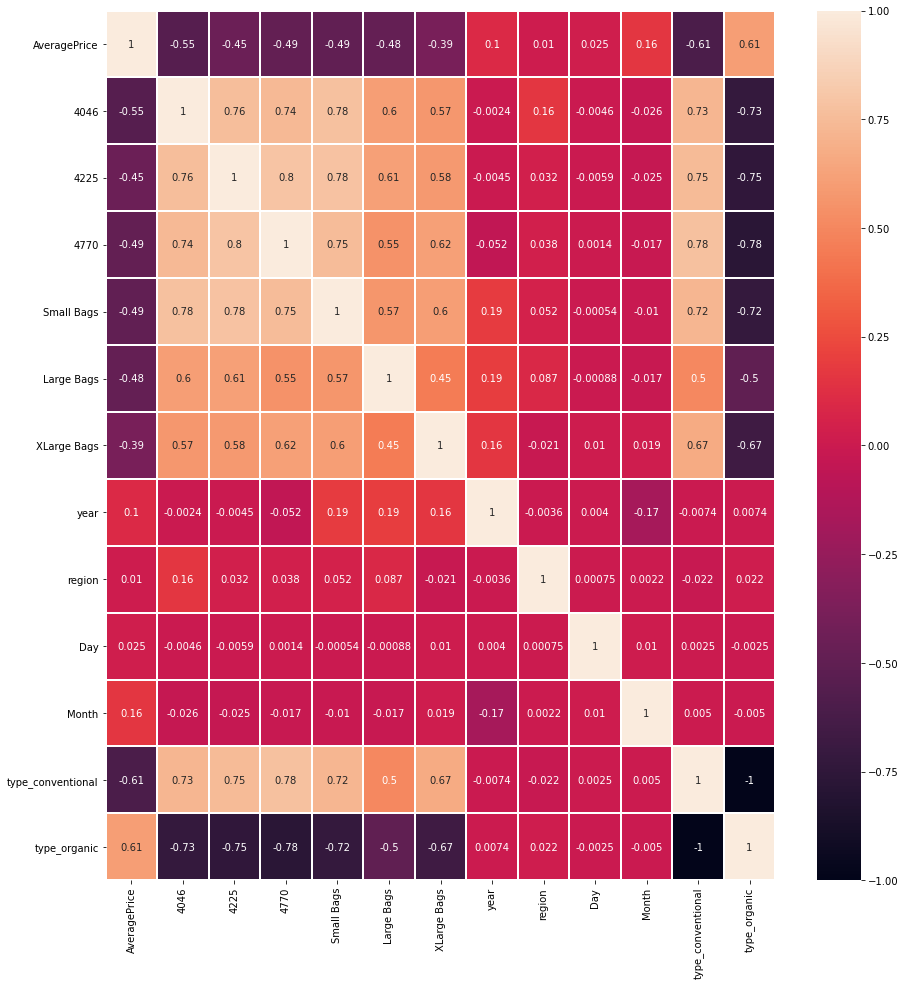

In [94]:
plt.figure(figsize=(15,16))
sns.heatmap(a_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column

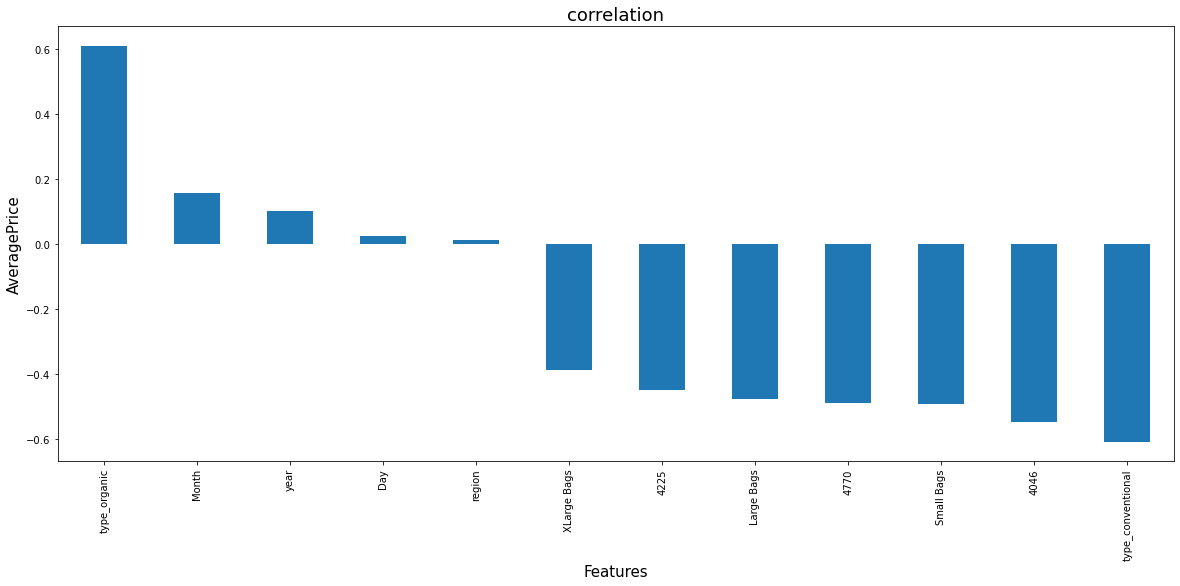

In [95]:
plt.figure(figsize = (20,8))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

`From the above graph it can be observed that 'type_organic' has the highest positive correlation with 'AveragePrice', 'type_conventional' has the highest negative correlation while 'region' has the weakest correlation.`

#### Feature Selection:

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
X =df.drop(columns=['AveragePrice'])
y =df['AveragePrice']

In [98]:
scaler= StandardScaler()

In [99]:
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif = pd.DataFrame()

In [102]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [103]:
vif

,Features,vif
0,4046,3.723160
1,4225,4.139977
2,4770,3.940502
3,Small Bags,4.103569
4,Large Bags,1.866024
5,XLarge Bags,2.039339
6,year,1.359839
7,region,1.079283
8,Day,1.000506
9,Month,1.051207


` No Multicollinearity`

### Selecting Kbest Features:

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif

In [105]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [106]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

              Feature      Score
11       type_organic  49.966168
10  type_conventional  49.966168
0                4046  36.480181
2                4770  27.651101
3          Small Bags  25.039951
4          Large Bags  23.354747
1                4225  21.772853
5         XLarge Bags  15.065353
6                year   3.163539
9               Month   2.850599
7              region   1.291093
8                 Day   1.249095


In [107]:
xbest = X.drop(columns=['region','Day'])

In [108]:
xbest

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,type_conventional,type_organic
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,12,1,0
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,12,1,0
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,12,1,0
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,12,1,0
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,11,1,0
...,...,...,...,...,...,...,...,...,...,...
17777,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,2,0,1
17778,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,1,0,1
17779,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,1,0,1
17780,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,1,0,1


In [109]:
 #Scaling features using Standard Scaler:
ssxbest = scaler.fit_transform(xbest)

In [110]:
ssxbest

array([[-0.64991752,  0.35827836, -0.21254977, ...,  1.64143354,
         1.02644331, -1.02644331],
       [-0.77006683,  0.27635525, -0.16511683, ...,  1.64143354,
         1.02644331, -1.02644331],
       [-0.72450758,  0.65600965,  0.03421507, ...,  1.64143354,
         1.02644331, -1.02644331],
       ...,
       [-0.61035022, -0.77439502,  0.45535467, ..., -1.4685724 ,
        -0.97423793,  0.97423793],
       [-0.53921073, -0.7116048 ,  0.45504464, ..., -1.4685724 ,
        -0.97423793,  0.97423793],
       [-0.35150339, -0.78720881,  0.16800815, ..., -1.4685724 ,
        -0.97423793,  0.97423793]])

### Regression Model Building

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Finding the Best Random State:

In [115]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(ssxbest,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8713873613687968 on random_state: 52


In [116]:
x_train,x_test,y_train,y_test = train_test_split(ssxbest,y,test_size = .33, random_state =11)

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [118]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Model Training:

In [119]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

 models have been trained

## `Ridge Regression Model`

In [120]:
y_r_pred = r.predict(x_test)

### R2 Score

In [121]:
r2_score(y_test,y_r_pred)

0.5116272273529452

### Mean Squared Error

In [122]:
mean_squared_error(y_test,y_r_pred)

0.0794600479383405

### Root Mean Squared Error

In [123]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

0.28188658701389196

## `Random Forest Regression Model`

In [124]:
y_rf_pred = rf.predict(x_test)

### R2 Score

In [125]:
r2_score(y_test,y_rf_pred)

0.8717245098968254

### Mean Squared Error

In [126]:
mean_squared_error(y_test,y_rf_pred)

0.020870894455614245

### Root Mean Squared Error

In [127]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

0.14446762424714488

## `XGB Regression Model`

In [128]:
y_xg_pred = xg.predict(x_test)

### R2 Score

In [129]:
r2_score(y_test,y_xg_pred)

0.8555557182982444

### Mean Squared Error

In [130]:
mean_squared_error(y_test,y_xg_pred)

0.023501616370279192

### Root Mean Squared Error

In [131]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

0.15330236909545525

## `Support Vector Regression Model:`

In [132]:
y_svr_pred = SV.predict(x_test)


### R2 Score

In [133]:
r2_score(y_test,y_svr_pred)

0.7759036796926365

### Mean Squared Error

In [134]:
mean_squared_error(y_test,y_svr_pred)

0.036461296271521774

### Root Mean Squared Error

In [135]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

0.19094841259230666

### `Decision Tree Regression Model`

In [136]:
y_dt_pred = dt.predict(x_test)

### R2 Score

In [137]:
r2_score(y_test,y_dt_pred)

0.7125412843825545

### Mean Squared Error

In [138]:
mean_squared_error(y_test,y_dt_pred)

0.04677059124211961

## `Model Cross Validation:`

In [139]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

### Ridge Regression

In [140]:
cross_val_score(r,ssxbest,y,cv=ShuffleSplit(5)).mean()

0.5033912899647894

### XGB Regression

In [141]:
cross_val_score(xg,ssxbest,y,cv=ShuffleSplit(5)).mean()

0.8551015204555684

### Random Forest Regression

In [142]:
cross_val_score(rf,ssxbest,y,cv=ShuffleSplit(5)).mean()

0.8757687611511985

### SV Regression

In [144]:
cross_val_score(SV,ssxbest,y,cv=ShuffleSplit(5)).mean()

0.7727928112910736

### Decision Tree Regression

In [146]:
cross_val_score(dt,ssxbest,y,cv=ShuffleSplit(5)).mean()

0.7415890900026534

## Above comparision of accuracy score with cross validation results suggest:
- Random Forest Regressor is the best model
- It has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning
####  Random Forest Regressor

In [147]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [148]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [150]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [152]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 80}

In [153]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)

In [154]:
Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [155]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

84.83528890215221


### `Random Forest Regressor has an accuracy of 84.83%`

#### Saving The Model

In [156]:
import joblib
joblib.dump(Best_mod,"BestAvocadoModel.pkl")

['BestAvocadoModel.pkl']

In [158]:
mod=joblib.load("BestAvocadoModel.pkl")

In [159]:
print(mod.predict(x_test))

[1.43316636 1.14772597 1.14078143 ... 1.2571065  2.03114693 1.28870869]


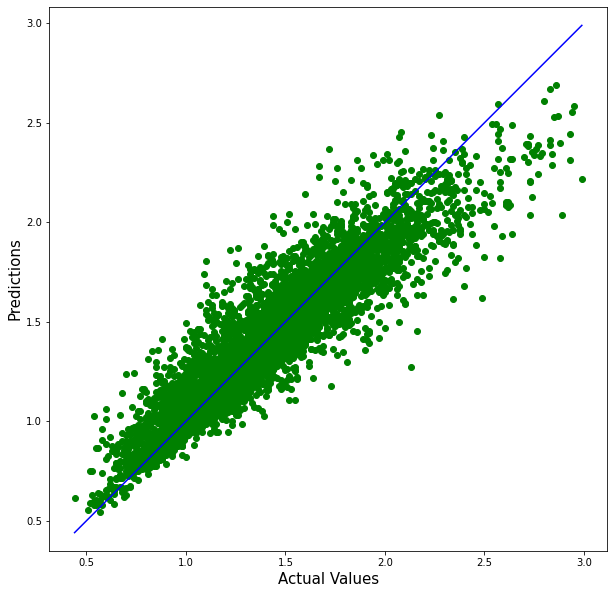

In [160]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rfpred, color='green')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(rfpred), max(y_test))
p2 = min(min(rfpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()